In [14]:
from uk_covid19 import Cov19API
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wdg
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [15]:
# filters 

cas_nation_filters_eng = [
    'areaType=Nation', "areaName=England" # 
]

cas_nation_filters_wales = [
    'areaType=Nation', "areaName=Wales" # 
]

cas_nation_filters_scot = [
    'areaType=Nation', "areaName=Scotland" # 
]

cas_nation_filters_northi = [
    'areaType=Nation', "areaName=Northern Ireland" # 
]

In [16]:
# structure

cas_nation_structure = {
    "date": "date",
    "areaName": "areaName",
    "newCases": "newCasesByPublishDate"
}

In [17]:
cas_nation_api_eng = Cov19API(filters=cas_nation_filters_eng, structure=cas_nation_structure)
cas_nation_data_eng = cas_nation_api_eng.get_json()

cas_nation_api_scot = Cov19API(filters=cas_nation_filters_scot, structure=cas_nation_structure)
cas_nation_data_scot = cas_nation_api_scot.get_json()

cas_nation_api_wales = Cov19API(filters=cas_nation_filters_wales, structure=cas_nation_structure)
cas_nation_data_wales = cas_nation_api_wales.get_json()

cas_nation_api_northi = Cov19API(filters=cas_nation_filters_northi, structure=cas_nation_structure)
cas_nation_data_northi = cas_nation_api_northi.get_json()


In [18]:
#print(cas_nation_data_lst_eng)


cas_nation_data = [cas_nation_data_eng, cas_nation_data_scot, cas_nation_data_wales, cas_nation_data_northi]
#print(cas_nation_data_lst)

with open('cas_nation_data.json', "wt") as OUTF:
    json.dump(cas_nation_data, OUTF)

    

In [19]:
with open("cas_nation_data.json", "rt") as INFILE:
    cas_nat_data = json.load(INFILE)

new_case_nat_data = []
for data in cas_nat_data:
    new_case_nat_data += data['data']



cas_nat_data = new_case_nat_data 


In [20]:
print(cas_nat_data)

[{'date': '2022-11-24', 'areaName': 'England', 'newCases': 20261}, {'date': '2022-11-23', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-22', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-21', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-20', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-19', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-18', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-17', 'areaName': 'England', 'newCases': 20866}, {'date': '2022-11-16', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-15', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-14', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-13', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-12', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-11', 'areaName': 'England', 'newCases': 0}, {'date': '2022-11-10', 'areaName': 'England', 'newCases': 21391}, {'date': '2022-11-09', 'areaName': 'England', 'newCases':

In [21]:


cas_nat_dates_raw=[dictionary['date'] for dictionary in cas_nat_data ]
cas_nat_dates_raw.sort()


cas_nat_dates_dic = {date for date in cas_nat_dates_raw} # removing duplicates by transforming into a dictionary and back into a sorted list / could also have done this via dict()
cas_nat_dates = list(cas_nat_dates_dic)
cas_nat_dates.sort()

#print(cas_nat_dates)

# gettingn start and end dates

cas_nat_start = cas_nat_dates[0]
print(cas_nat_start)
cas_nat_end = cas_nat_dates[-1]
print(cas_nat_end)

2020-01-31
2022-11-24


In [22]:
# transforming from date model to a month based model to have better bar charts in the end

# getting the full timeseries (in case any entries are missign)

def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

cas_nat_startdate=parse_date(cas_nat_dates[0])
cas_nat_enddate=parse_date(cas_nat_dates[-1])
#print (cas_nat_startdate, '–', cas_nat_enddate)

cas_nat_index_m=pd.date_range(cas_nat_startdate, cas_nat_enddate, freq='M')
#print(cas_nat_index_m)

cas_nat_index_d=pd.date_range(cas_nat_startdate, cas_nat_enddate, freq='D')
#print(cas_nat_index_d)


In [23]:
# building the data frame

cas_nat_df_d = pd.DataFrame(index=cas_nat_index_d, columns = ("England", "Scotland", "Wales", "Northern Ireland"))
print(cas_nat_df_d)

cas_nat_df_m = pd.DataFrame(index=cas_nat_index_m, columns = ("England", "Scotland", "Wales", "Northern Ireland"))
print(cas_nat_df_m)

           England Scotland Wales Northern Ireland
2020-01-31     NaN      NaN   NaN              NaN
2020-02-01     NaN      NaN   NaN              NaN
2020-02-02     NaN      NaN   NaN              NaN
2020-02-03     NaN      NaN   NaN              NaN
2020-02-04     NaN      NaN   NaN              NaN
...            ...      ...   ...              ...
2022-11-20     NaN      NaN   NaN              NaN
2022-11-21     NaN      NaN   NaN              NaN
2022-11-22     NaN      NaN   NaN              NaN
2022-11-23     NaN      NaN   NaN              NaN
2022-11-24     NaN      NaN   NaN              NaN

[1029 rows x 4 columns]
           England Scotland Wales Northern Ireland
2020-01-31     NaN      NaN   NaN              NaN
2020-02-29     NaN      NaN   NaN              NaN
2020-03-31     NaN      NaN   NaN              NaN
2020-04-30     NaN      NaN   NaN              NaN
2020-05-31     NaN      NaN   NaN              NaN
2020-06-30     NaN      NaN   NaN              NaN
2020-0

In [24]:
# create a variable with only the newCases data for areaName="England" ### depreciated ###

england_caes = [dictionary['newCases'] for dictionary in cas_nat_data if dictionary['areaName'] == "England"]

#print(england_caes)

england_cases = []
for entry in cas_nat_data:
    if entry['areaName'] == 'England':
        england_cases += [entry['newCases']] #### omg i just looked for 2h for a bug and I just needed to add a [] 

print(england_cases)




[20261, 0, 0, 0, 0, 0, 0, 20866, 0, 0, 0, 0, 0, 0, 21391, 0, 0, 0, 0, 0, 0, 28209, 0, 0, 0, 0, 0, 0, 39178, 0, 0, 0, 0, 0, 0, 52672, 0, 0, 0, 0, 0, 0, 59101, 0, 0, 0, 0, 0, 0, 58832, 0, 0, 0, 0, 0, 0, 46853, 0, 0, 0, 0, 0, 0, 33497, 0, 0, 0, 0, 0, 0, 27055, 0, 0, 0, 0, 0, 0, 28258, 0, 0, 0, 0, 0, 0, 0, 24908, 0, 0, 0, 0, 0, 0, 27732, 0, 0, 0, 0, 0, 0, 35168, 0, 0, 0, 0, 0, 0, 46284, 0, 0, 0, 0, 0, 0, 57277, 0, 0, 0, 0, 0, 0, 81951, 0, 0, 0, 0, 0, 0, 123568, 0, 0, 0, 0, 0, 0, 171877, 0, 0, 0, 0, 0, 0, 120170, 0, 0, 0, 0, 20731, 21732, 21428, 21415, 47332, 0, 0, 16489, 17481, 17202, 16432, 36452, 0, 0, 12065, 12080, 13401, 12031, 28249, 0, 0, 9217, 9741, 9298, 10240, 29155, 0, 0, 0, 0, 5313, 5802, 13590, 0, 0, 4661, 5293, 5810, 6352, 14592, 0, 0, 6003, 6704, 7388, 8102, 16903, 0, 0, 6511, 10874, 8036, 9751, 21712, 0, 0, 9405, 10311, 14596, 29029, 0, 0, 0, 9705, 10945, 13481, 13045, 35925, 0, 0, 15832, 18475, 20767, 93281, 0, 0, 0, 0, 27283, 29335, 31230, 75194, 0, 0, 33782, 38678, 42392,

In [25]:
# filling the dataframe by iterating through the datalist and per dictionary assigning the values based on nationality



for dictionary in cas_nat_data:
    date=parse_date(dictionary['date'])

    if dictionary['areaName'] == "England":

        value= float(dictionary['newCases']) if dictionary['newCases']!=None else 0.0

        cas_nat_df_d.loc[date, "England"]= value

    if dictionary['areaName'] == "Scotland":

        value= float(dictionary['newCases']) if dictionary['newCases']!=None else 0.0

        cas_nat_df_d.loc[date, "Scotland"]= value


    if dictionary['areaName'] == "Wales":

        value= float(dictionary['newCases']) if dictionary['newCases']!=None else 0.0

        cas_nat_df_d.loc[date, "Wales"]= value

    if dictionary['areaName'] == "Northern Ireland":

        value= float(dictionary['newCases']) if dictionary['newCases']!=None else 0.0

        cas_nat_df_d.loc[date, "Northern Ireland"]= value

cas_nat_df_d.fillna(0.0, inplace=True)


print(cas_nat_df_d)


            England  Scotland  Wales  Northern Ireland
2020-01-31      2.0       0.0    0.0               0.0
2020-02-01      0.0       0.0    0.0               0.0
2020-02-02      0.0       0.0    0.0               0.0
2020-02-03      0.0       0.0    0.0               0.0
2020-02-04      0.0       0.0    0.0               0.0
...             ...       ...    ...               ...
2022-11-20      0.0       0.0    0.0               0.0
2022-11-21      0.0       0.0    0.0               0.0
2022-11-22      0.0       0.0    0.0               0.0
2022-11-23      0.0    1929.0    0.0               0.0
2022-11-24  20261.0       0.0  283.0               0.0

[1029 rows x 4 columns]


<AxesSubplot:>

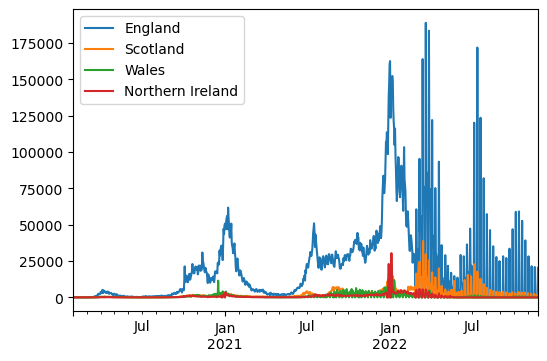

In [26]:
cas_nat_df_d.plot()

<AxesSubplot:>

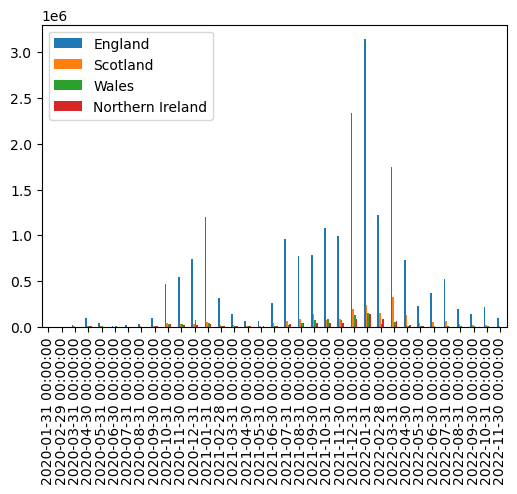

In [27]:
cas_nat_df_m = cas_nat_df_d.resample('m').sum()
#print(cas_nat_df_m)

cas_nat_df_m.plot(kind='bar')

<AxesSubplot:>

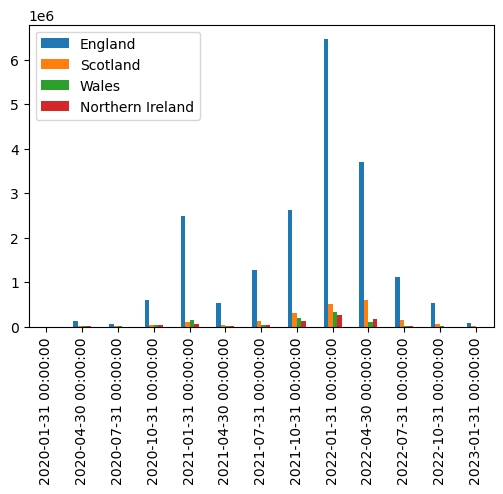

In [28]:
cas_nat_df_m = cas_nat_df_d.resample('3m').sum() # can I make the time interval slidable?
#print(cas_nat_df_m)

cas_nat_df_m.plot(kind='bar')

In [29]:
# making this interactive

slider_dis = True

natcols=wdg.SelectMultiple(
    options=['England', 'Scotland', 'Wales', 'Northern Ireland'], # options available
    value=['England', 'Scotland', 'Wales', 'Northern Ireland'], # initial value
    rows=4, # rows of the selection box
    description='Nations',
    disabled=False
)

timescale=wdg.RadioButtons(
    options=['Daily', 'Monthly'],
    description='Scale:',
    disabled=False
)

timeslider=wdg.IntSlider(
    value=3,
    min=1,
    max=12,
    step=1,
    description='Months:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

timeslider2=wdg.IntSlider(
    value=1,
    min=1,
    max=31,
    step=1,
    description='Days:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

controls=wdg.HBox([natcols, timescale])
sliderbox=wdg.HBox([timeslider, timeslider2])



def age_graph(nationcolumns, tscale, timevalue, timevalue2):

    # our callback function.
    ncols=len(nationcolumns)
    
    m_value = str(timeslider.value) + "m"
    d_value = str(timeslider2.value) + "d"

    if ncols>0:

        if  tscale=='Daily':
            cas_nat_df_dd = cas_nat_df_d.resample(d_value).sum() # had to use the dd naming to have a new variable -> could be cleaner
            cas_nat_df_dd.plot( y=list(nationcolumns))
            plt.show()


        

        else: 
            cas_nat_df_m = cas_nat_df_d.resample(m_value).sum()
            cas_nat_df_m.plot( y=list(nationcolumns), kind='bar', use_index=True)
            plt.show()
            slider_dis = False
            print(slider_dis)
            return slider_dis

    else:
        
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")
    
  
output1=wdg.interactive_output(age_graph, {'nationcolumns': natcols, "tscale": timescale, "timevalue": timeslider, "timevalue2":timeslider2}) # clean up slider names + order





display(controls, output1, sliderbox)


### question: how do I take in the slider_dis value from the function? How can I show / no show the slider?


Output()